In [17]:
print("Edge Type DFS Algorithm Modification:")
import networkx as nx
import matplotlib.pyplot as plt

Edge Type DFS Algorithm Modification:


In [18]:
# graph = {
#     0: [1, 2],
#     1: [0, 2, 4, 5],
#     2: [0, 1, 3, 6],
#     3: [2],
#     4: [1, 5],
#     5: [1, 4, 6],
#     6: [2, 5],
#     7: [8],
#     8: [7, 9],
#     9: [8]
# }

graph = {
    's': ['z', 'w'],
    't': ['v', 'u'],
    'u': ['t', 'v'],
    'v': ['s', 'w'],
    'w': ['x'],
    'x': ['z'],
    'y': ['x'],
    'z': ['y', 'w'],
}

# graph = {
#     0: [1, 2],
#     1: [0, 2],
#     2: [0, 1, 3, 4],
#     3: [2, 4],
#     4: [2, 3],
#     5: [6],
#     6: [5, 7],
#     7: [6],
#     8: [9],
#     9: [8],
#     10: []
# }

position = {
    's': (7,5),
    't': (10,5),
    'u': (10,1),
    'v': (7,1),
    'w': (4,1),
    'x': (1,1),
    'y': (1,5),
    'z': (4,5)
}

In [4]:
# color = ['white' for u in graph]
# parent = [None for u in graph]
# start = [-1 for u in graph]
# finish = [-1 for u in graph]
# t = 0

color = {}
parent = {}
start = {}
finish = {}
edgeType = {}
t = 0

for u in graph:
    color[u] = 'white'
    parent[u] = None
    start[u] = -1
    finish[u] = -1
    edgeType[u] = {}

def dfs(graph):

    for u in graph:
        if color[u] == 'white':
            dfs_visit(graph, u)
            
def dfs_visit(graph, u):
    
    color[u] = 'gray'
    global t
    t += 1
    start[u] = t
    
    printInfo(u)
        
    for v in graph[u]:
        edgeType[u][v] = None
        
        if color[v] == 'black':
            if isContained(v, u):
                edgeType[u][v] = 'Forward'
            else:
                edgeType[u][v] = 'Cross'
        
        if color[v] == 'gray':
            edgeType[u][v] = 'Back'
        
        if color[v] == 'white':
            edgeType[u][v] = 'Tree'
            parent[v] = u
            dfs_visit(graph, v)
            printInfo(u) 
                   
    t += 1
    finish[u] = t
    color[u] = 'black'
    
    printInfo(u)
    
def isContained(v, u):
    # v is contained in u
    # u.start                   u.finish
    # |<-----------u----------->|
    #          |<---v--->|
    #         v.start    v.finish
    
    if((start[v] > start[u]) and (finish[u]==-1)):
        return True
    
def printInfo(u):
    print("Node:", u)
#     print("Color:", color[u])
#     print("Start:", start[u])
#     print("Finish:", finish[u])
#     print("Parent:", parent[u])
#     print()
    
def printAllInfo(graph):
    
    print("Node\t Start\t Finish\t Parent")
    for u in graph:
        print(u, "\t", start[u], "\t", finish[u], "\t", parent[u])

In [5]:
dfs(graph)

Node: s
Node: z
Node: y
Node: x
Node: x
Node: y
Node: y
Node: z
Node: w
Node: w
Node: z
Node: z
Node: s
Node: s
Node: t
Node: v
Node: v
Node: t
Node: u
Node: u
Node: t
Node: t


In [6]:
printAllInfo(graph)

Node	 Start	 Finish	 Parent
s 	 1 	 10 	 None
t 	 11 	 16 	 None
u 	 14 	 15 	 t
v 	 12 	 13 	 t
w 	 7 	 8 	 z
x 	 4 	 5 	 y
y 	 3 	 6 	 z
z 	 2 	 9 	 s


In [7]:
graph

{'s': ['z', 'w'],
 't': ['v', 'u'],
 'u': ['t', 'v'],
 'v': ['s', 'w'],
 'w': ['x'],
 'x': ['z'],
 'y': ['x'],
 'z': ['y', 'w']}

In [8]:
edgeType

{'s': {'w': 'Forward', 'z': 'Tree'},
 't': {'u': 'Tree', 'v': 'Tree'},
 'u': {'t': 'Back', 'v': 'Cross'},
 'v': {'s': 'Cross', 'w': 'Cross'},
 'w': {'x': 'Cross'},
 'x': {'z': 'Back'},
 'y': {'x': 'Tree'},
 'z': {'w': 'Tree', 'y': 'Tree'}}

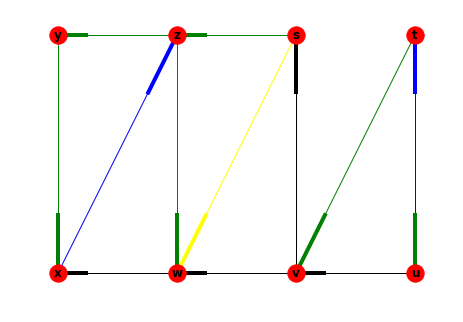

In [30]:
G = nx.DiGraph()
G.clear()

for u in graph:
    G.add_node(str(u), pos = position[u])
    
edgeColors = []
for u in graph:
    for v in graph[u]:
        if edgeType[u][v] == 'Tree':
            edgeColor = 'Green'
        elif edgeType[u][v] == 'Forward':
            edgeColor = 'Yellow'
        elif edgeType[u][v] == 'Back':
            edgeColor = 'Blue'
        else:
            edgeColor = 'Black'
            
        edgeColors.append(edgeColor)
        G.add_edge(str(u), str(v))

pos=nx.get_node_attributes(G,'pos')
# nx.draw(G,pos,with_labels=True, font_weight='bold')
        
nx.draw(G,pos, with_labels=True, font_weight='bold', edge_color=edgeColors)
plt.show()

In [31]:
print(list(G.nodes))
print(list(G.edges))

['s', 't', 'u', 'v', 'w', 'x', 'y', 'z']
[('s', 'z'), ('s', 'w'), ('t', 'v'), ('t', 'u'), ('u', 't'), ('u', 'v'), ('v', 's'), ('v', 'w'), ('w', 'x'), ('x', 'z'), ('y', 'x'), ('z', 'y'), ('z', 'w')]
